In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Task 1:

In [22]:
data = load_iris(as_frame=True)

In [23]:
data.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.data)

C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

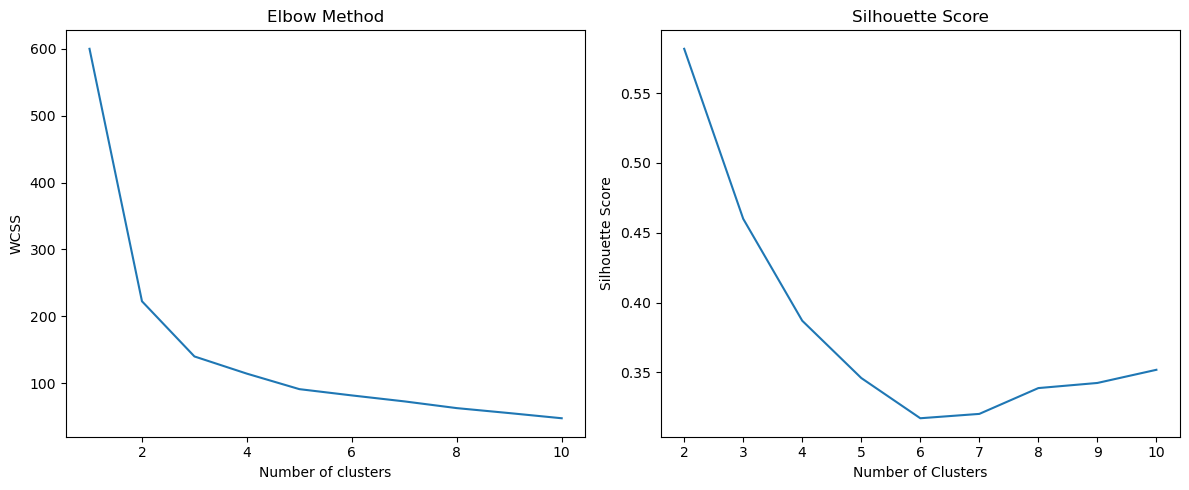

In [33]:
wcss = []
silhouette_scores = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
    if i > 1:
        silhouette_scores.append(silhouette_score(X_scaled, km.labels_))

plt.figure(figsize=(12, 5))
#plt.subplot(nrows, ncols, index)
plt.subplot(1, 2, 1)
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range(2,11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [43]:
km2 = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
km2.fit(X_scaled) #returns the model
#km2.predict(X_scaled) returns the cluster labels
labels = km2.fit_predict(X_scaled) #fit the models and returns the cluster label

from collections import Counter
print('Clusters predicted by k-means:', Counter(labels))
print('Target label from dataset:', Counter(data.target))
print('Silhouette Score: ', silhouette_score(X_scaled, labels))

C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters predicted by k-means: Counter({0: 53, 1: 50, 2: 47})
Target label from dataset: Counter({0: 50, 1: 50, 2: 50})
Silhouette Score:  0.45994823920518646


## Task 2:

In [157]:
import pandas as pd

In [159]:
data2 = pd.read_excel('lab-datasets/Online Retail.xlsx')
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [160]:
data2.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [161]:
data2.dropna(subset=['Description','CustomerID'], inplace=True)

In [162]:
data2.duplicated().sum()

5225

In [163]:
data2.drop_duplicates(inplace=True)

In [164]:
data2.info()
data2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [165]:
data2 = data2[(data2['UnitPrice'] > 0) & (data2['Quantity'] > 0)]
data2['TotalPrice'] = data2['UnitPrice'] * data2['Quantity']
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Since one customer has bought more than one items so we will create a separata dataframe where we will record the recency(how recently a customer purchased), frequency(how often they purchase), and monetary value(how much they spend) of each customer to get a better idea of the dataset

In [174]:
latest_date = data2['InvoiceDate'].max() + pd.Timedelta(days=1)
#days since last purchase
recency = data2.groupby('CustomerID')['InvoiceDate'].max()
recency = (latest_date - recency).dt.days
frequency = data2.groupby('CustomerID')['InvoiceNo'].nunique()
monetary = data2.groupby('CustomerID')['TotalPrice'].sum()
total_items = data2.groupby('CustomerID')['Quantity'].sum()
unique_items = data2.groupby('CustomerID')['StockCode'].nunique()

analysis = pd.DataFrame({'Recency':recency, 'Frequency':frequency, 'Monetary':monetary, 'TotalItemsBought':total_items, 'UniqueItems':unique_items})
analysis['AveragePurchase'] = analysis['TotalItemsBought'] / analysis['Frequency']
analysis.head()

,Recency,Frequency,Monetary,TotalItemsBought,UniqueItems,AveragePurchase
CustomerID,,,,,,
12346.0,326,1,77183.60,74215,1,74215.000000
12347.0,2,7,4310.00,2458,103,351.142857
12348.0,75,4,1797.24,2341,22,585.250000
12349.0,19,1,1757.55,631,73,631.000000
12350.0,310,1,334.40,197,17,197.000000


In [176]:
type(analysis)

pandas.core.frame.DataFrame

In [178]:
analysis.info()
analysis.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Recency           4338 non-null   int64  
 1   Frequency         4338 non-null   int64  
 2   Monetary          4338 non-null   float64
 3   TotalItemsBought  4338 non-null   int64  
 4   UniqueItems       4338 non-null   int64  
 5   AveragePurchase   4338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 237.2 KB


,Recency,Frequency,Monetary,TotalItemsBought,UniqueItems,AveragePurchase
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2048.688081,1187.644537,61.501153,252.462892
std,100.014169,7.697998,8985.230220,5043.619654,85.366768,1312.769337
min,1.000000,1.000000,3.750000,1.000000,1.000000,1.000000
25%,18.000000,1.000000,306.482500,159.000000,16.000000,92.000000
50%,51.000000,2.000000,668.570000,378.000000,35.000000,161.000000
75%,142.000000,5.000000,1660.597500,989.750000,77.000000,270.000000
max,374.000000,209.000000,280206.020000,196915.000000,1787.000000,74215.000000


They are customers who buys in bulk which make the distribution highhly skewed

In [181]:
import numpy as np
analysis_log = np.log1p(analysis)
ss = StandardScaler()
analysis_scaled = ss.fit_transform(analysis_log)

In [183]:
type(analysis_scaled)

numpy.ndarray

In [185]:
analysis_scaled = pd.DataFrame(analysis_scaled, columns=analysis_log.columns)

In [187]:
type(analysis_scaled)

pandas.core.frame.DataFrame

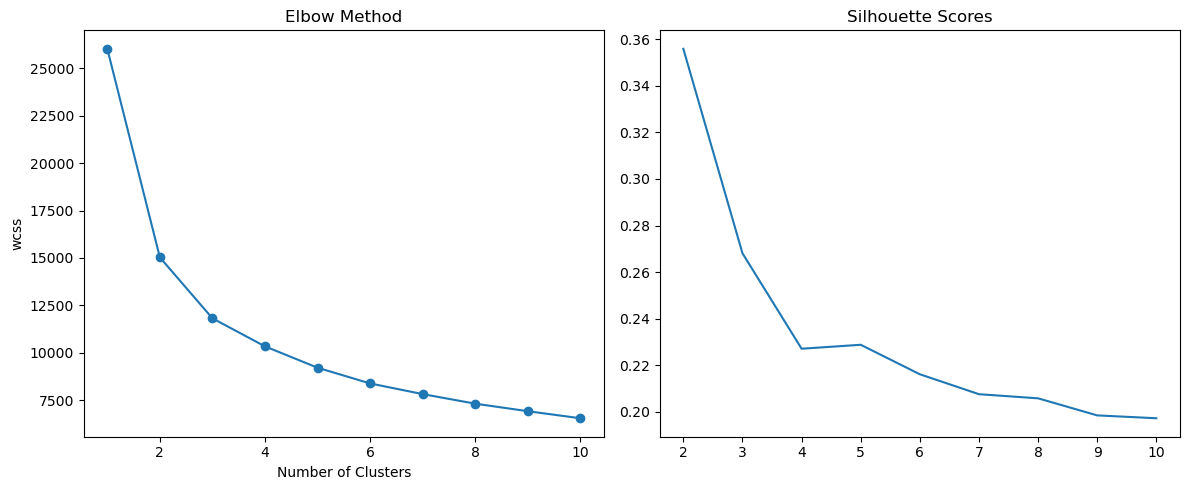

In [189]:
wcss = []
silhouette_scores = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    res = km.fit_predict(analysis_scaled)
    wcss.append(km.inertia_)
    if i > 1:
        silhouette_scores.append(silhouette_score(analysis_scaled, res))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range(2,11), silhouette_scores)
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()

In [191]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
labels = km.fit_predict(analysis_scaled)
print('Clusters predicted by k-means:', Counter(labels))

Clusters predicted by k-means: Counter({0: 2426, 1: 1912})


In [193]:
analysis_scaled['Label'] = labels


In [195]:
type(analysis_scaled)

pandas.core.frame.DataFrame

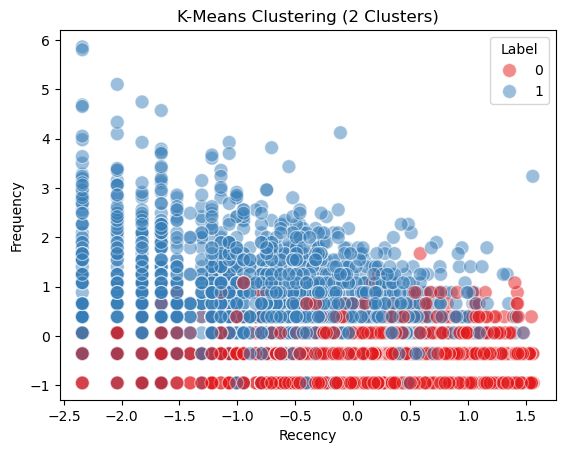

In [209]:
import seaborn as sns
sns.scatterplot(
    x='Recency',
    y='Frequency',
    hue=analysis_scaled['Label'],   # color by cluster
    data=analysis_scaled,
    alpha=0.5,
    palette='Set1', # distinct colors for each cluster
    s=100            # point size
)

plt.title('K-Means Clustering (2 Clusters)')
plt.show()

## Task 3:

In [212]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [216]:
#creating fake data
np.random.seed(42)
n_customers = 500

financial_data = {
  'Income': np.random.normal(50000, 20000, n_customers),
  'Spending': np.random.normal(15000, 8000, n_customers),
  'Savings': np.random.normal(10000, 5000, n_customers),
  'Investments': np.random.normal(5000, 3000, n_customers),
  'CreditScore': np.random.normal(700, 100, n_customers),
  'DebtAmount': np.random.normal(8000, 6000, n_customers),
  'LoanAmount': np.random.normal(20000, 10000, n_customers)
}

df = pd.DataFrame(financial_data)
df = df.clip(lower=0)

df

,Income,Spending,Savings,Investments,CreditScore,DebtAmount,LoanAmount
0,59934.283060,22409.420380,16996.777183,7335.083228,632.482173,11423.677983,921.924421
1,47234.713977,30275.333124,14623.168415,3346.442851,685.548133,13809.107963,11396.149892
2,62953.770762,3811.459409,10298.151850,2545.403350,620.758008,6012.149701,15863.944666
3,80460.597128,19503.753894,6765.316111,4989.876628,669.203847,4326.579593,38876.876573
4,45316.932506,9794.859447,13491.116568,4489.446132,510.638533,1489.096841,25565.531245
...,...,...,...,...,...,...,...
495,60778.200874,12751.197657,20030.464441,8210.450715,781.320519,8464.883111,39351.540401
496,29255.076913,29381.492215,20307.517883,4920.436222,672.103707,9546.515241,28155.010224
497,46193.226438,20126.742890,16041.831153,2354.376046,672.023983,549.436547,19519.114927
498,32487.634932,10430.568082,15120.312629,4510.799108,779.037190,10005.058503,18168.495289


In [218]:
ss = StandardScaler()
X_scaled = ss.fit_transform(df)

In [222]:
pca = PCA()
pca.fit(X_scaled)
print('Explained variance ratio: ', pca.explained_variance_ratio_)
print('\nCumulative variance: ', np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio:  [0.1684364  0.16392871 0.1454779  0.14016998 0.13147102 0.12899535
 0.12152064]

Cumulative variance:  [0.1684364  0.3323651  0.477843   0.61801299 0.74948401 0.87847936
 1.        ]


Components for 80% variance: 6


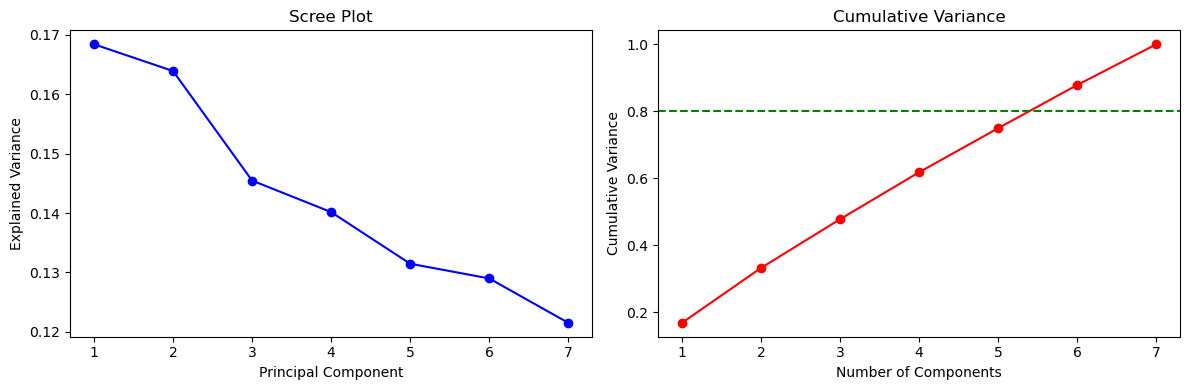

In [226]:
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumsum_var >= 0.80) + 1
print(f"Components for 80% variance: {n_components}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'ro-')
plt.axhline(y=0.80, color='g', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance')

plt.tight_layout()
plt.show()

In [228]:
pca = PCA(0.8)
X_pca = pca.fit_transform(X_scaled)
print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape: {X_pca.shape}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")

Original shape: (500, 7)
Reduced shape: (500, 6)
Total variance explained: 0.8785


In [230]:
# Analyze feature contributions
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(
  loadings,
  columns=[f'PC{i+1}' for i in range(n_components)],
  index=df.columns
)

print("Feature Contributions:")
print(loading_df.round(3))

Feature Contributions:
               PC1    PC2    PC3    PC4    PC5    PC6
Income      -0.543 -0.263  0.257 -0.075  0.691 -0.174
Spending     0.563  0.144  0.415  0.438  0.129  0.120
Savings      0.603 -0.155 -0.308  0.066  0.586 -0.012
Investments -0.228 -0.584  0.041  0.412 -0.069  0.640
CreditScore -0.066  0.595  0.353 -0.336  0.217  0.553
DebtAmount   0.217 -0.375  0.740 -0.161 -0.176 -0.269
LoanAmount  -0.320  0.447  0.115  0.688  0.043 -0.270


In [234]:
# Create transformed dataset
pca_df = pd.DataFrame(
  X_pca,
  columns=[f'PC{i+1}' for i in range(n_components)]
)

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.487301,-1.964453,0.087679,-0.378264,0.878855,0.505524
1,2.124654,-0.234615,1.055735,-0.037590,0.451571,-0.288702
2,-0.858902,-0.317017,-1.111479,-1.036140,0.176704,-1.174892
3,-1.583666,0.698928,0.424755,1.567695,0.873432,-0.752671
4,-0.164595,-0.416503,-2.074864,0.892438,-0.094155,-1.164772


In [236]:
print("PCA Summary:")
print(f"Dimensionality reduced from {df.shape[1]} to {n_components} features")
print(f"Variance retained: {pca.explained_variance_ratio_.sum()*100:.2f}%")
print(f"Reduction: {((1 - n_components/df.shape[1])*100):.1f}%")

for i, var in enumerate(pca.explained_variance_ratio_, 1):
  print(f"PC{i}: {var*100:.2f}%")

PCA Summary:
Dimensionality reduced from 7 to 6 features
Variance retained: 87.85%
Reduction: 14.3%
PC1: 16.84%
PC2: 16.39%
PC3: 14.55%
PC4: 14.02%
PC5: 13.15%
PC6: 12.90%
